<h2 style='color:blue' align='left'>Small Image Classification Using CNN (Convolutional Neural Network)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

small_images.jpg

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
plt.imshow(X_train[0])

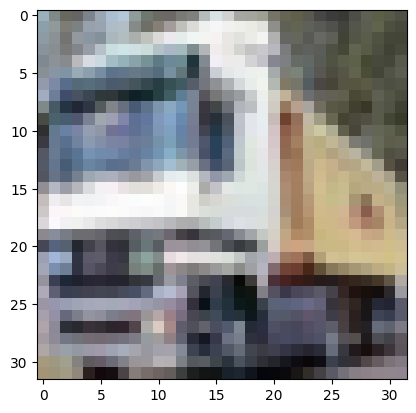

In [ ]:
plt.imshow(X_train[1])

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

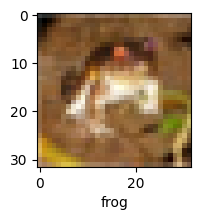

In [ ]:
plot_sample(X_train, y_train, 0)

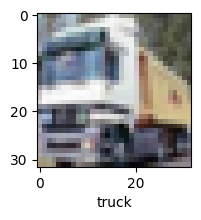

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [ ]:
# I have too small GPU VRAM to run the training.
# Below, I disable the GPU mode.
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# Exceed system memory.

# I have to use the google colab to run.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
ann = tf.keras.models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 138s 87ms/step - loss: 1.8125 - accuracy: 0.3531
Epoch 2/5
1563/1563 [==============================] - 138s 89ms/step - loss: 1.6247 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.5457 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4845 - accuracy: 0.4757
Epoch 5/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4352 - accuracy: 0.4961


- Use Google Colab to run as below:

![image.png](attachment:ed873475-1cc3-4e7e-a04b-793b37c7ca38.png)

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [ ]:
# Colab have to run all in one script.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
ann = tf.keras.models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.8142 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.6236 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5427 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4813 - accuracy: 0.4769
Epoch 5/5
313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.69      0.51      1000
           1       0.72      0.42      0.53      1000
           2       0.40      0.22      0.28      1000
           3       0.41      0.19      0.26      1000
           4       0.37      0.45      0.41      1000
           5       0.50      0.23      0.32      1000
           6       0.34      0.78      0.48      1000
           7       0.66      0.41      0.51      1000
     

- run metrics

![image.png](attachment:2b51afc7-f08b-4033-ad3f-914be3e3896b.png)

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [ ]:
# My Computer does not enought GPU VRAM to train.
# Use Colab
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# My computer does have enought GPU VRAM to train.
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4354 - accuracy: 0.4884
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0904 - accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9571 - accuracy: 0.6683
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8652 - accuracy: 0.6992
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7941 - accuracy: 0.7238
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7421 - accuracy: 0.7429
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6837 - accuracy: 0.7623
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6349 - accuracy: 0.7788
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5911 - accuracy: 0.7936
Epoch 10/10
1563/1563 [==============================] - 66s 42m

- Result run from Colab

![image.png](attachment:9c972fc0-e8a9-4b20-8b9f-e29dfe2886c6.png)

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.8882 - accuracy: 0.7072


[0.8882031440734863, 0.7071999907493591]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[4.6355765e-02, 1.0012616e-02, 2.6842554e-03, 8.7152213e-01,
        8.4905367e-04, 6.3938081e-02, 9.7923214e-04, 4.9702365e-05,
        1.0688824e-03, 2.5401772e-03],
       [3.0415047e-05, 4.0219410e-04, 3.7061432e-07, 3.0827115e-07,
        5.6593148e-09, 2.2563461e-10, 6.4737781e-12, 2.0659901e-11,
        9.9955624e-01, 1.0483008e-05],
       [9.3761180e-03, 6.6802549e-01, 2.5331243e-03, 3.1345394e-03,
        2.5912930e-04, 7.3472635e-05, 5.6693068e-05, 1.2646641e-03,
        2.1706891e-01, 9.8207705e-02],
       [8.2120478e-01, 1.9193189e-03, 2.9648136e-02, 1.6040792e-04,
        1.1673091e-03, 5.8033079e-06, 4.3065877e-05, 1.7139737e-05,
        1.4574505e-01, 8.9023946e-05],
       [1.6399894e-05, 4.2599961e-05, 3.6400639e-02, 1.1912493e-01,
        4.1413996e-01, 5.1082496e-04, 4.2971724e-01, 3.4486443e-06,
        2.0830281e-05, 2.3036800e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

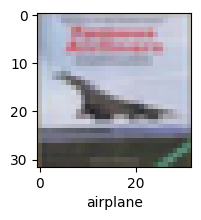

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4595 - accuracy: 0.4746
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1016 - accuracy: 0.6125
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9789 - accuracy: 0.6604
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8882 - accuracy: 0.6929
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8210 - accuracy: 0.7145
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7620 - accuracy: 0.7367
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7097 - accuracy: 0.7541
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6597 - accuracy: 0.7713
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6126 - accuracy: 0.7891
Epoch 10/10
313/313 [==============================] - 4s 11ms/s

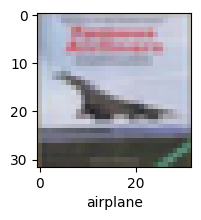

In [ ]:
# Complete CNN code on Google Colab
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# My computer does have enought GPU VRAM to train.
cnn.fit(X_train, y_train, epochs=10)
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)
print('y_pred[:5]:')
print(y_pred[:5])
# true label: [3, 8, 8, 0, 6] ("cat", "ship", "ship", "airplane", "frog"]
y_classes = [np.argmax(element) for element in y_pred]
print('y_classes[:5]:')
print(y_classes[:5])
# predict class: [5, 8, 1, 0, 6] ("dog", "ship". "automobile", "airplane", "frog"]
# some of them got wrong.
print('y_test[:5]:')
print(y_test[:5])
plot_sample(X_test, y_test, 3)
# Orginal test sample is 3: "airplan", predict is airplane.

# make the prediction:
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print('classes[y_classes[0]]:', classes[y_classes[0]]) # airplane.
print('classes[y_classes[3]]:', classes[y_classes[3]]) # cat

# Print the final report.
print("Classification Report: \n", classification_report(y_test, y_pred_classes))